In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df_ad_t = pd.read_csv('ad_title.csv')

In [3]:
df_ad_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18122 entries, 0 to 18121
Data columns (total 2 columns):
adId      18122 non-null int64
wordId    18122 non-null int64
dtypes: int64(2)
memory usage: 283.3 KB


In [4]:
arr = pd.DataFrame(df_ad_t['wordId'])
arr = arr.drop_duplicates().reset_index()
print(arr)

      index  wordId
0         0      24
1         1      25
2         2      26
3         3      27
4         4      28
...     ...     ...
2103  18051    2681
2104  18058    2682
2105  18084    1965
2106  18094    2683
2107  18101    1861

[2108 rows x 2 columns]


In [5]:
arr['index'] = arr['wordId']
arr['wordId'] = arr['wordId'].astype('object')
print(arr)

      index wordId
0        24     24
1        25     25
2        26     26
3        27     27
4        28     28
...     ...    ...
2103   2681   2681
2104   2682   2682
2105   1965   1965
2106   2683   2683
2107   1861   1861

[2108 rows x 2 columns]


In [6]:
df_inx = pd.get_dummies(arr)
df_inx.head(10)

,index,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_inx.rename(columns={'index':'wordId'}, inplace = True)
df_inx.head(10)

,wordId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,29,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,32,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_inx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2108 entries, 0 to 2107
Columns: 2109 entries, wordId to wordId_2683
dtypes: int64(1), uint8(2108)
memory usage: 4.3 MB


In [9]:
df_ad_title = pd.merge(df_ad_t, df_inx, how = 'inner', on = 'wordId')
df_ad_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18122 entries, 0 to 18121
Columns: 2110 entries, adId to wordId_2683
dtypes: int64(2), uint8(2108)
memory usage: 36.8 MB


In [10]:
df_ad_title.head(15)

,adId,wordId,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
0,6,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1801,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2320,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3087,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3107,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,28,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,509,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1801,25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_ad_title = df_ad_title.drop(['wordId'], axis=1)

In [12]:
df_ad_title = df_ad_title.groupby(['adId'])[df_ad_title.filter(regex='wordId_.*').columns].sum()

In [13]:
df_ad_title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252 entries, 6 to 7867
Columns: 2108 entries, wordId_0 to wordId_2683
dtypes: uint8(2108)
memory usage: 6.6 MB


In [14]:
df_ad_title.head(15)

,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,wordId_10,...,wordId_2674,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683
adId,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df_ad_title.iloc[:, 1:2109].values

In [16]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [17]:
kmeans = KMeans(n_clusters=120, init='k-means++', max_iter=500, n_init=10)
pred_y = kmeans.fit_predict(X)


In [18]:
df_ad_title['Cluster'] = pred_y

In [19]:
df_ad_title

,wordId_0,wordId_1,wordId_3,wordId_4,wordId_5,wordId_6,wordId_7,wordId_8,wordId_9,wordId_10,...,wordId_2675,wordId_2676,wordId_2677,wordId_2678,wordId_2679,wordId_2680,wordId_2681,wordId_2682,wordId_2683,Cluster
adId,,,,,,,,,,,,,,,,,,,,,
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7863,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001438A667248>]],
      dtype=object)

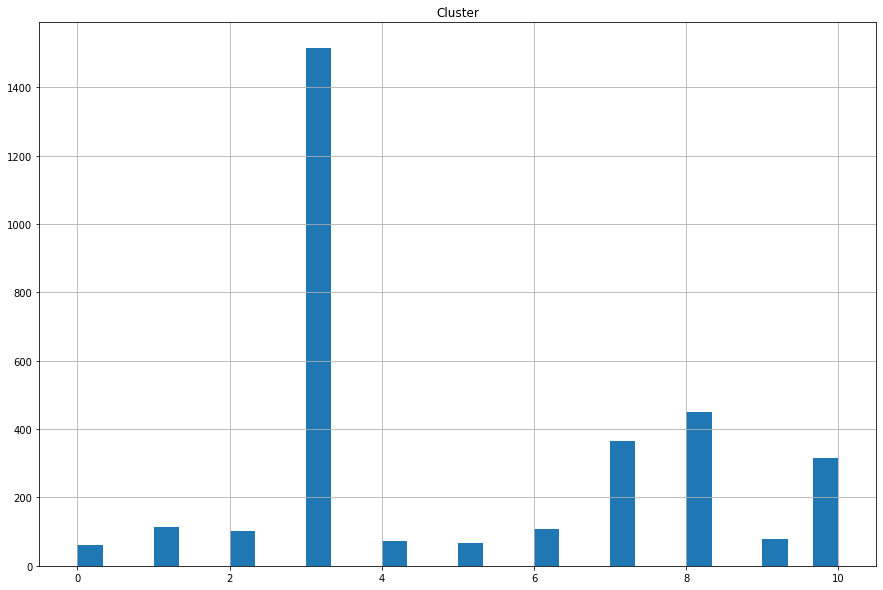

In [20]:
df_ad_title.hist(column='Cluster',bins=30, figsize=(15, 10))

In [21]:
df_ad_cluster = df_ad_title.filter(['adId','Cluster'], axis=1)

In [22]:
df_ad_cluster.head(10)

,Cluster
adId,
6,3
7,3
8,3
11,3
13,3
14,10
15,3
17,3
18,8


In [23]:
df_ad_cluster.to_csv('ad_cluster.csv')